Use Kedro with IPython and Jupyter Notebooks/Lab    

https://kedro.readthedocs.io/en/latest/11_tools_integration/02_ipython.html     

https://kedro.readthedocs.io/en/stable/12_faq/01_faq.html#what-is-data-engineering-convention    


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
%reload_kedro

2021-04-07 00:20:25,316 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2021-04-07 00:20:25,427 - root - INFO - Registered hooks from 2 installed plugin(s): kedro-mlflow-0.7.0
2021-04-07 00:20:25,457 - root - INFO - ** Kedro project xflats
2021-04-07 00:20:25,458 - root - INFO - Defined global variable `context`, `session` and `catalog`
2021-04-07 00:20:25,470 - root - INFO - Registered line magic `run_viz`


In [3]:
df = catalog.load('flatsjsonlines')

2021-04-07 00:20:25,479 - kedro.io.data_catalog - INFO - Loading data from `flatsjsonlines` (JSONLineDataSet)...


In [4]:
df.dtypes

_id                              object
additional_info                  object
building_material                object
building_type                    object
date_created             datetime64[ns]
date_modified            datetime64[ns]
description                      object
download_date            datetime64[ns]
download_date_utc               float32
flat_size                       float32
floor                           float32
GC_addr_city                     object
GC_addr_country                  object
GC_addr_country_code             object
GC_addr_house_number             object
GC_addr_neighbourhood            object
GC_addr_postcode                 object
GC_addr_road                     object
GC_addr_state                    object
GC_addr_suburb                   object
GC_boundingbox                   object
GC_latitude                     float32
GC_longitude                    float32
location                         object
main_url                         object


## Data preview

In [5]:
df.isna().sum() / df.shape[0]

2021-04-07 00:24:53,434 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


_id                      0.000000
additional_info          0.000000
building_material        0.000000
building_type            0.000000
date_created             0.219889
date_modified            0.111406
description              0.000000
download_date            0.000000
download_date_utc        0.000000
flat_size                0.000000
floor                    0.026697
GC_addr_city             0.000000
GC_addr_country          0.000000
GC_addr_country_code     0.000000
GC_addr_house_number     0.253665
GC_addr_neighbourhood    0.000000
GC_addr_postcode         0.000000
GC_addr_road             0.000000
GC_addr_state            0.000000
GC_addr_suburb           0.000000
GC_boundingbox           0.000000
GC_latitude              0.000000
GC_longitude             0.000000
location                 0.000000
main_url                 0.000000
market                   0.000000
name                     0.000000
number_of_floors         0.124919
offeror                  0.000000
price         

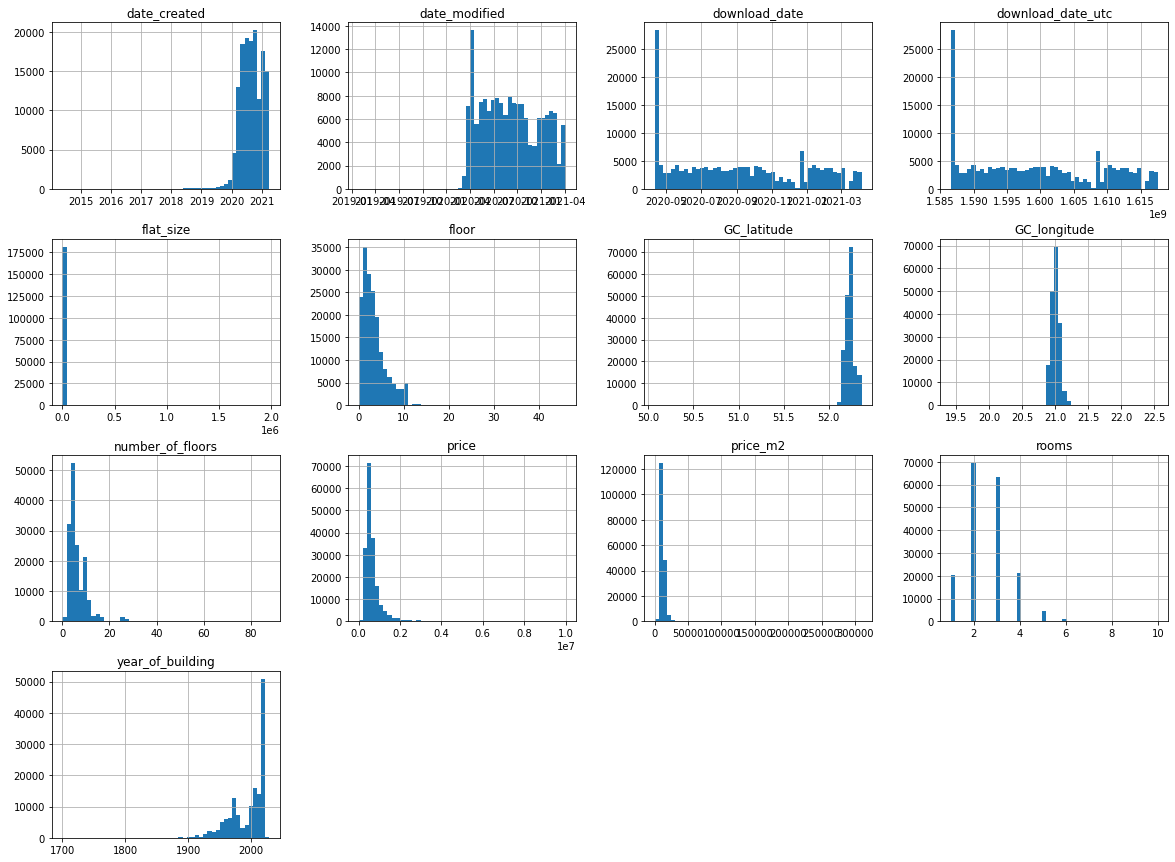

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15)) 
plt.show()


In [7]:
df.head(1).T

,0
_id,oto_61355393_1520000
additional_info,
building_material,None
building_type,None
date_created,2021-01-06 00:40:51
date_modified,2021-01-06 00:41:04
description,Kupno BEZPOŚREDNIO W NAJLEPSZEJ CENIE bez prow...
download_date,2021-01-06 00:06:55.421000
download_date_utc,1609891584.0
flat_size,108.0


## Data normalisation

In [8]:
market = lambda x: 'wtorny' if x.lower().startswith('w') else 'pierwotny'

In [9]:
df.market.apply(market)

0         pierwotny
1         pierwotny
2         pierwotny
3         pierwotny
4         pierwotny
            ...    
181664       wtorny
181665       wtorny
181666       wtorny
181667       wtorny
181668       wtorny
Name: market, Length: 181669, dtype: object

In [10]:
df.apply(lambda x: min(x['date_modified'], x['date_created'], x['download_date']).date(), axis=1)

0         2021-01-06
1         2021-01-06
2         2021-01-06
3         2021-01-06
4         2021-01-06
             ...    
181664    2020-05-17
181665    2020-05-17
181666    2020-05-17
181667    2020-05-17
181668    2020-05-17
Length: 181669, dtype: object

In [11]:
import re
from unidecode import unidecode

In [12]:
df.building_type.fillna('n/a').replace({'':'n/a'}).apply(lambda x: re.sub(r'\s+',' ', unidecode(x).lower())).value_counts()

blok                              79510
apartamentowiec                   39643
none                              37198
kamienica                         16102
apartamentowiec                    1823
n/a                                1465
blok                               1002
blok mieszkalny                     929
kamienica                           743
dom wolnostojacy                    641
dom wielorodzinny/szeregowiec       543
niski blok                          497
szeregowiec                         461
wiezowiec                           308
pozostale                           255
budynek wielorodzinny               102
budynek apartamentowy                82
loft                                 48
nowe budownictwo                     45
mieszkalno-biurowy                   31
plomba                               30
apartamentowo-handlowy               29
dom wielorodzinny                    22
dom                                  19
niski wielorodzinny                  15


In [13]:
def building_type(x):
    _tmp = unidecode(x[:200]).lower()
    if any([i in _tmp for i in ('blok','mieszkanie')]):
        return 'blok'
    elif any([i in _tmp for i in ('dom','szeregowiec', 'segment', 'blizniak', 'willa', 'rezydencja')]):
        return 'dom'
    elif any([i in _tmp for i in ('apartamentowiec', 'wiezowiec', 'loft')]):
        return 'apartamentowiec'
    elif any([i in _tmp for i in ('kamienica','historyczny')]):
        return 'kamienica'
    else:
        return 'n/a'

In [14]:
df.building_type.fillna('n/a').apply(building_type).value_counts()

blok               81952
apartamentowiec    41823
n/a                39305
kamienica          16860
dom                 1729
Name: building_type, dtype: int64

In [15]:
df.building_material.fillna('n/a').replace({'':'n/a'}).apply(lambda x: re.sub(r'\s+',' ', unidecode(x).lower())).value_counts().head(20)

none                95587
cegla               44246
inne                13983
wielka plyta         7113
zelbet               3398
n/a                  3109
pustak               2611
plyta                2387
cegla                2029
rama h               1755
silikat              1462
beton                1326
beton komorkowy       494
mieszana              427
rama h                327
wielka plyta          296
zelbeton              132
pustak                102
techn. mieszana        87
zroznicowany           81
Name: building_material, dtype: int64

In [16]:
def building_material(x):
    if 'cegla' in unidecode(x).lower():
        return 'cegla'
    elif 'plyta' in unidecode(x).lower():
        return 'plyta'
    elif 'zelbet' in unidecode(x).lower():
        return 'zelbet'
    elif 'pustak' in unidecode(x).lower():
        return 'pustak'
    elif 'rama' in unidecode(x).lower():
        return 'rama'
    elif 'silikat' in unidecode(x).lower():
        return 'silikat'
    elif 'beton' in unidecode(x).lower():
        return 'beton'
    else:
        return 'n/a'

In [17]:
df.building_material.fillna('n/a').apply(building_material).value_counts()

n/a        113692
cegla       46380
plyta        9875
zelbet       3539
pustak       2746
rama         2084
beton        1883
silikat      1470
Name: building_material, dtype: int64

In [18]:
df.property_form.fillna('n/a').replace({'':'n/a'}).apply(lambda x: re.sub(r'\s+',' ', unidecode(x).lower())).value_counts().head(20)

pelna wlasnosc                       66803
none                                 46480
wlasnosc                             19868
spoldzielcze wlasnosciowe            12185
n/a                                  12140
nan                                   9496
spoldzielcze wl. z kw                 7253
wlasnosc                              3542
spoldzielcze wlasnosciowe z kw        2614
spoldzielcze wlasnosciowe              363
spoldzielcze wlasnosciowe z kw         215
udzial                                 190
odrebna wlasnosc lokalu                 70
hipoteczne                              67
umowa z developerem                     49
spoldzielcze-wlasnosciowe               44
spoldzielcze wl. z kw                   34
spoldzielcze + kw                       33
spoldzielcza wlasnosciowa z kw          30
spoldzielcza wlasnosciowa bez kw        28
Name: property_form, dtype: int64

In [19]:
def property_form(x):
    _tmp = re.sub(r'\s+',' ', unidecode(x).lower())
    if ('spol' in _tmp) and ('wl' in _tmp) and ('bez' in _tmp) and ('kw' in _tmp):
        return 'spol_wlasnosc'
    elif ('spol' in _tmp) and ('wl' in _tmp) and ('kw' in _tmp):
        return 'spol_wlasnosc_kw'
    elif ('spol' in _tmp) and ('wl' in _tmp):
        return 'spol_wlasnosc'
    elif ('spol' in _tmp) and ('kw' in _tmp):
        return 'spol_kw'
    elif ('wlasn' in _tmp):
        return 'wlasnosc'
    elif ('umowa' in _tmp) and ('develop' in _tmp):
        return 'umowa_z_developerem'
    elif ('hipo' in _tmp):
        return 'hipoteczne'
    elif ('udzial' in _tmp):
        return 'udzial'
    else:
        return 'n/a'

In [20]:
df.property_form.fillna('n/a').apply(property_form).value_counts()

wlasnosc               90292
n/a                    68168
spol_wlasnosc          12673
spol_wlasnosc_kw       10189
udzial                   196
hipoteczne                67
umowa_z_developerem       49
spol_kw                   35
Name: property_form, dtype: int64

In [21]:
df.offeror.fillna('n/a').replace({'':'n/a'}).apply(lambda x: re.sub(r'\s+',' ', unidecode(x).lower())).value_counts().head(20)

oferta biura nieruchomosci          77509
none                                37166
oferta prywatna                     27933
osoby prywatnej                     10650
agencja                              6765
oferta dewelopera                    2788
biuro / deweloper                    2349
investor nieruchomosci franchise     1429
platan house                          950
oferta posrednika                     927
lloyd properties                      835
biuro sprzedazy                       597
eteria consulting sp. z o.o.          550
nieruchomosci chlebowski              469
tur nieruchomosci                     299
en casa premium real estate           294
sokratesa development                 265
westa home                            263
prywatny                              239
deweloper                             232
Name: offeror, dtype: int64

In [22]:
def offeror(x):
    if 'pryw' in unidecode(x).lower():
        return 'prywatna'
    if 'dew' in unidecode(x).lower():
        return 'deweloper'
    if 'dev' in unidecode(x).lower():
        return 'deweloper'
    else:
        return 'agencja'


In [23]:
df.offeror.fillna('n/a').apply(offeror).value_counts()

agencja      136644
prywatna      38822
deweloper      6203
Name: offeror, dtype: int64

### District

In [24]:
_locations = df.query("GC_addr_city=='Warszawa'").location.apply(lambda x: unidecode(x)).apply(lambda x: x[:])

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', min_df=0.001, ngram_range=(1,1))
X = vectorizer.fit_transform(_locations)

In [26]:
print(vectorizer.get_feature_names())

['47', '49', 'adama', 'al', 'aleja', 'aleje', 'aleksandra', 'aluzyjna', 'antoniego', 'augusta', 'batalionow', 'bemowo', 'berensona', 'bezposrednio', 'bialoleka', 'bielany', 'blisko', 'bokserska', 'branickiego', 'brodno', 'broniewskiego', 'bruzdowa', 'brzeziny', 'budki', 'centrum', 'chelmzynska', 'chlopskich', 'chomiczowka', 'chrzanow', 'cybernetyki', 'czyste', 'deweloperski', 'dolny', 'domaniewska', 'dzieci', 'edwarda', 'franciszka', 'gen', 'goclaw', 'goclawek', 'gor', 'gorce', 'gorczewska', 'gorny', 'grochow', 'grochowska', 'grodzisk', 'grodziskie', 'grojecka', 'grzybowska', 'herbu', 'ii', 'imielin', 'jana', 'jelonki', 'jerozolimskie', 'jerzego', 'jezioranskiego', 'jozefa', 'juliana', 'juliusza', 'kabaty', 'kamionek', 'karola', 'kasprzaka', 'katy', 'kazimierza', 'kepa', 'klobucka', 'kolo', 'konstantego', 'ksawerow', 'lazurowa', 'leona', 'ludwika', 'marcina', 'marysin', 'maszynowa', 'mazowieckie', 'mehoffera', 'miasto', 'mieszkaniowy', 'mikolaja', 'milosna', 'mirow', 'mlynow', 'mokotow

In [28]:
df.GC_addr_suburb.value_counts() 

Mokotów           25043
Wola              23685
Śródmieście       20996
Białołęka         17724
Praga-Południe    14503
Ursynów            9955
Bemowo             9222
Bielany            7938
Ursus              7422
Ochota             6773
Targówek           6401
Wilanów            6054
Włochy             4996
Praga-Północ       4747
Warszawa           4399
Żoliborz           4261
Wawer              3390
Sielce             1548
Rembertów          1229
Wesoła              740
None                331
Natolin             287
Imielin              13
Kabaty                8
Czyżyny               1
Krowodrza             1
Wolica                1
Łódź-Polesie          1
Name: GC_addr_suburb, dtype: int64

In [29]:
import re

df['District'] = df.location.apply(lambda x: unidecode(x).lower())
df['District'] = df.District.apply(lambda x: re.split(", +", x)[1] if len(re.split(", +", x)) > 1 else 'n/a')
tmp_loc = pd.DataFrame(df['District'].value_counts()).query("District > 1000").index.values
tmp_loc = [i for i in tmp_loc if i not in ('n/a', 'mazowieckie')]

_district_GC = df.GC_addr_suburb.fillna('').apply(lambda x: unidecode(x).lower())

In [30]:
sorted(tmp_loc)

['bemowo',
 'bialoleka',
 'bielany',
 'mokotow',
 'ochota',
 'praga-polnoc',
 'praga-poludnie',
 'rembertow',
 'srodmiescie',
 'targowek',
 'ursus',
 'ursynow',
 'wawer',
 'wilanow',
 'wlochy',
 'wola',
 'zoliborz']

In [31]:
df['District'] = df['District'].apply(lambda x: x if x in tmp_loc else np.nan)

In [32]:
df[['District','GC_addr_suburb']].fillna("").apply(lambda x: x.apply(lambda z: unidecode(z).lower())).assign(cnt=1). \
    groupby(['District','GC_addr_suburb']).count().reset_index(). \
    pivot_table(values='cnt', index='GC_addr_suburb', columns='District',aggfunc=sum). \
    style.format("{:,.0f}").background_gradient(cmap='coolwarm')

District,,bemowo,bialoleka,bielany,mokotow,ochota,praga-polnoc,praga-poludnie,rembertow,srodmiescie,targowek,ursus,ursynow,wawer,wilanow,wlochy,wola,zoliborz
GC_addr_suburb,,,,,,,,,,,,,,,,,,
bemowo,"1,620","7,459",2,16,3,nan,nan,nan,1,7,4,11,nan,nan,nan,10,87,2
bialoleka,"2,518",2,"15,130",4,28,2,5,nan,nan,2,29,nan,nan,1,nan,1,nan,2
bielany,"1,363",29,9,"6,220",nan,nan,nan,1,nan,nan,1,nan,nan,4,nan,nan,1,310
czyzyny,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
imielin,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10,nan,nan,nan,nan,nan
kabaty,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6,nan,nan,nan,nan,nan
krowodrza,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
lodz-polesie,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mokotow,"4,132",8,6,3,"20,362",50,2,9,nan,88,5,2,138,2,210,7,15,4


GC_addr_suburb is enaught accurate, no need to complicate feature engineering. 

### code

In [33]:
import re
from unidecode import unidecode
import numpy as np
import pandas as pd

def market(x):
    if x.lower().startswith('w'):
        return 'wtorny'  
    else:
        return'pierwotny'

def building_type(x):
    _tmp = unidecode(x).lower()
    if any([i in _tmp for i in ('blok','mieszkanie')]):
        return 'blok'
    elif any([i in _tmp for i in ('dom','szeregowiec', 'segment', 'blizniak', 'willa', 'rezydencja')]):
        return 'dom'
    elif any([i in _tmp for i in ('apartamentowiec', 'wiezowiec', 'loft')]):
        return 'apartamentowiec'
    elif any([i in _tmp for i in ('kamienica','historyczny')]):
        return 'kamienica'
    else:
        return 'n/a'

    
def building_material(x):
    _tmp = unidecode(x).lower()
    if 'cegla' in _tmp:
        return 'cegla'
    elif 'plyta' in _tmp:
        return 'plyta'
    elif 'zelbet' in _tmp:
        return 'zelbet'
    elif 'pustak' in _tmp:
        return 'pustak'
    elif 'rama' in _tmp:
        return 'rama'
    elif 'silikat' in _tmp:
        return 'silikat'
    elif 'beton' in _tmp:
        return 'beton'
    else:
        return 'n/a'
    

def property_form(x):
    _tmp = re.sub(r'\s+',' ', unidecode(x).lower())
    if ('spol' in _tmp) and ('wl' in _tmp) and ('bez' in _tmp) and ('kw' in _tmp):
        return 'spol_wlasnosc'
    elif ('spol' in _tmp) and ('wl' in _tmp) and ('kw' in _tmp):
        return 'spol_wlasnosc_kw'
    elif ('spol' in _tmp) and ('wl' in _tmp):
        return 'spol_wlasnosc'
    elif ('spol' in _tmp) and ('kw' in _tmp):
        return 'spol_kw'
    elif ('wlasn' in _tmp):
        return 'wlasnosc'
    elif ('umowa' in _tmp) and ('develop' in _tmp):
        return 'umowa_z_developerem'
    elif ('hipo' in _tmp):
        return 'hipoteczne'
    elif ('udzial' in _tmp):
        return 'udzial'
    else:
        return 'n/a'
    

def offeror(x):
    _tmp = unidecode(x).lower()
    if 'pryw' in _tmp:
        return 'prywatna'
    if 'dew' in _tmp:
        return 'deweloper'
    if 'dev' in _tmp:
        return 'deweloper'
    else:
        return 'agencja'


def date_offer(*dates):
    return min(dates).date()


In [34]:
df.offeror = df.offeror.fillna('n/a').apply(offeror)
df.property_form = df.property_form.fillna('n/a').apply(property_form)
df.building_material = df.building_material.fillna('n/a').apply(building_material)
df.building_type = df.building_type.fillna('n/a').apply(building_type)
df.market = df.market.fillna('n/a').apply(market)

In [35]:
df['date_offer'] = df['date_modified'].combine_first(df['date_created']).combine_first(df['download_date'])

In [36]:
df.sample(5, random_state=666)

,_id,additional_info,building_material,building_type,date_created,date_modified,description,download_date,download_date_utc,flat_size,...,producer_name,property_form,rooms,tracking_id,url,year_of_building,data_lat,data_lon,District,date_offer
116903,oto_61573017_610000,,n/a,blok,2021-03-02 16:22:17,2021-03-02 16:22:31,Do sprzedania:\n4 pokojowe mieszkanie zlokaliz...,2021-03-02 15:41:51.120,1.614700e+09,57.0,...,otodom,wlasnosc,4.0,61573017,https://www.otodom.pl/pl/oferta/4-pokoje-ursus...,1981.0,NaN,NaN,ursus,2021-03-02 16:22:31
37973,oto_60825015_803607,"Powierzchnia: 67,53 m² Liczba pokoi: 4 Rynek...",n/a,n/a,2020-08-13 14:32:42,2020-08-13 14:32:58,"Udogodnienia: Bogata infrastruktura, bliskość ...",2020-08-13 12:41:39.903,1.597322e+09,67.0,...,otodom,n/a,4.0,60825015,https://www.otodom.pl/oferta/urokliwa-inwestyc...,2022.0,NaN,NaN,praga-polnoc,2020-08-13 14:32:58
38609,gra_16668344_580000,tel 48 pokaż numer Lokalizacja Warszawa Ochota...,cegla,blok,NaT,2020-05-18 00:00:00,"Opis ogłoszenia\n\n Ładne, rozkładowe 2...",2020-05-18 14:29:53.904,1.589812e+09,51.0,...,gratka,n/a,2.0,16668344,https://gratka.pl/nieruchomosci/mieszkanie-war...,NaN,NaN,NaN,ochota,2020-05-18 00:00:00
160809,oto_59546409_685000,.css-dy3ptp{display:-webkit-box;display:-webki...,beton,blok,2019-08-04 12:27:10,2020-04-12 20:33:35,Czteropokojowe mieszkanie mieszczące się na 4 ...,2020-04-12 18:34:19.837,1.586716e+09,78.0,...,otodom,wlasnosc,4.0,59546409,https://www.otodom.pl/oferta/4-pokojowe-miesz-...,2006.0,NaN,NaN,ursus,2020-04-12 20:33:35
46476,oto_60847160_785000,"Powierzchnia: 75,17 m² Liczba pokoi: 3 Rynek...",n/a,blok,2020-08-20 11:41:59,2020-08-20 11:42:21,3 pokojowe mieszkanie zlokalizowane Bielany b...,2020-08-20 10:03:09.703,1.597918e+09,75.0,...,otodom,wlasnosc,3.0,60847160,https://www.otodom.pl/oferta/3-pokojowe-mieszk...,2012.0,NaN,NaN,bielany,2020-08-20 11:42:21


## One dimensional analysis

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.ticker import FuncFormatter


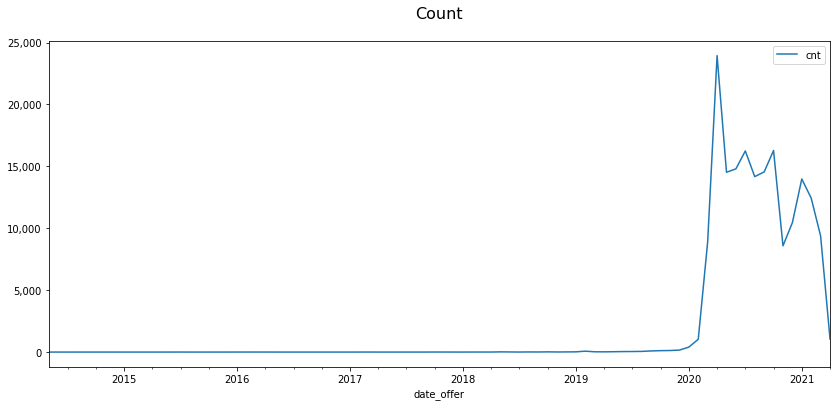

In [38]:
fig, ax = plt.subplots(figsize=(14,6))
_tmp = pd.DataFrame(
    {'date_offer':df.date_offer.dt.to_period("M"),
     'price':df.price})
_tmp.assign(cnt=1).groupby('date_offer').aggregate(cnt=('cnt','count')).plot(ax=ax)

plt.title('Count', y=1.05, fontsize = 16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y))) 


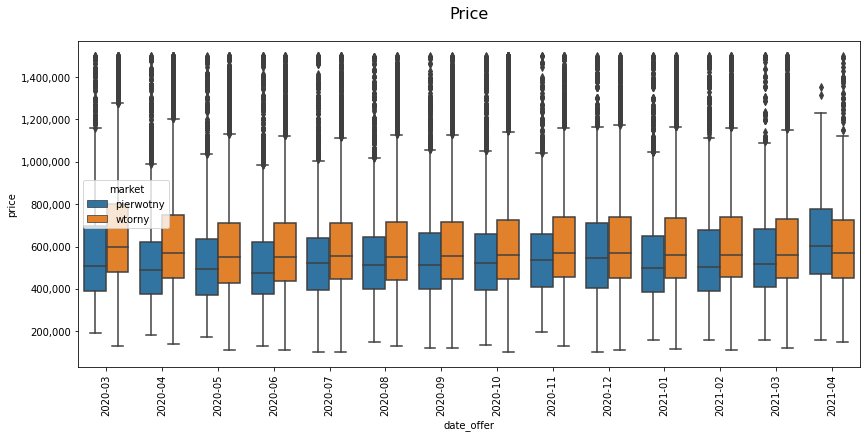

In [39]:
_tmp = pd.DataFrame(
    {'date_offer':df.date_offer.dt.to_period("M"),
     'market':df.market,
     'GC_addr_city':df.GC_addr_city,
     'price':df.price})
_tmp = _tmp.query("date_offer >= '2020-03' and price > 10e4 and price < 15e5 and GC_addr_city=='Warszawa'").reset_index()


fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(x="date_offer",  y="price",hue='market', data=_tmp, ax=ax, order=sorted(_tmp.date_offer.unique()))
plt.xticks(rotation=90)
plt.title('Price', y=1.05, fontsize = 16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y))) 
plt.show()

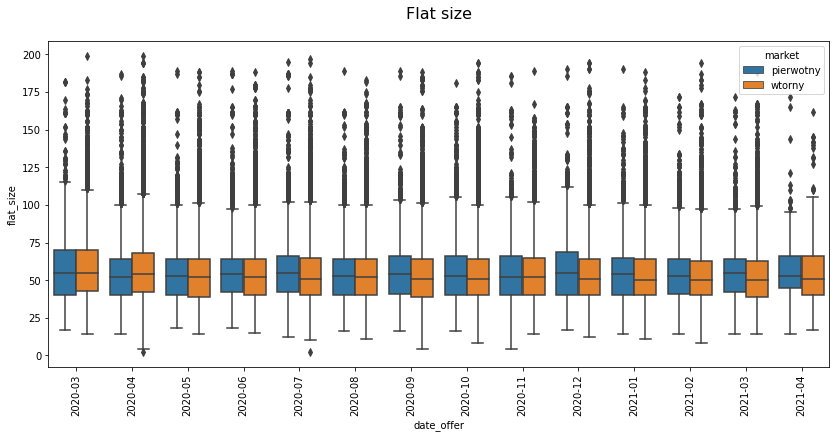

In [40]:
_tmp = pd.DataFrame(
    {'date_offer':df.date_offer.dt.to_period("M"),
     'price':df.price,
     'market':df.market,
     'GC_addr_city':df.GC_addr_city,
     'flat_size':df.flat_size})
_tmp = _tmp.query("date_offer >= '2020-03' and price > 10e4 and price < 15e5 and flat_size < 200 and GC_addr_city=='Warszawa'").reset_index()


fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(x="date_offer",  y="flat_size", hue='market', data=_tmp, ax=ax, order=sorted(_tmp.date_offer.unique()))
plt.xticks(rotation=90)
plt.title('Flat size', y=1.05, fontsize = 16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}'.format(y))) 
plt.show()

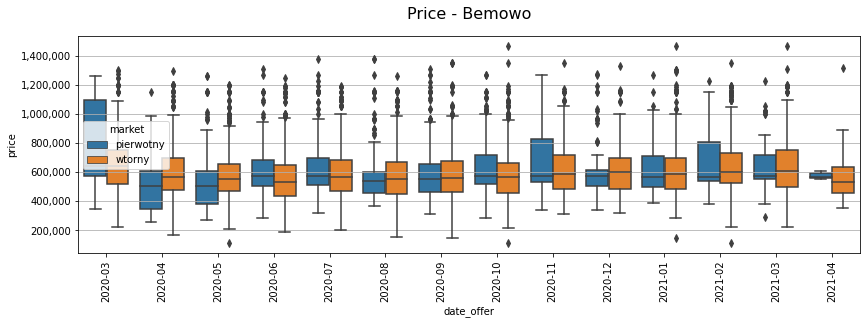

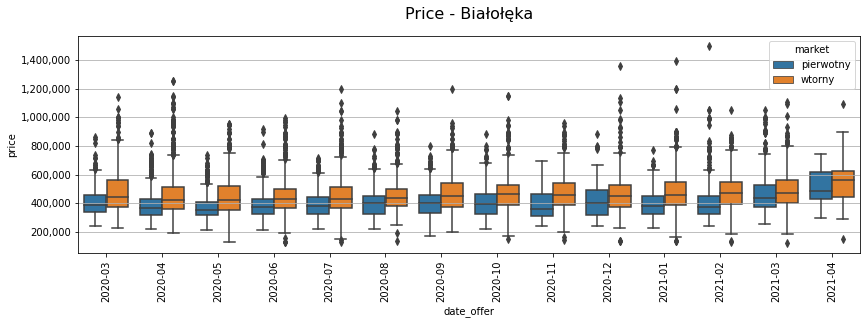

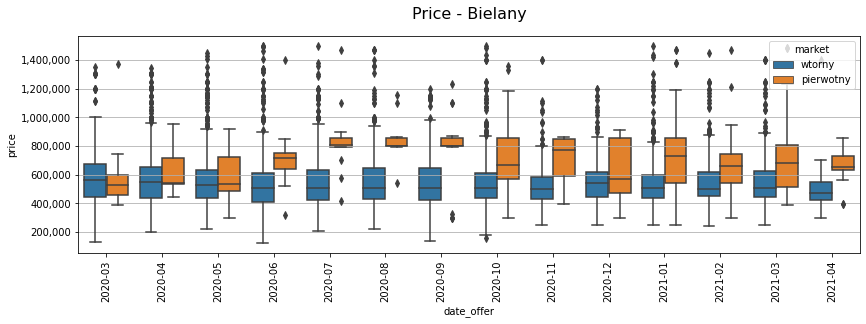

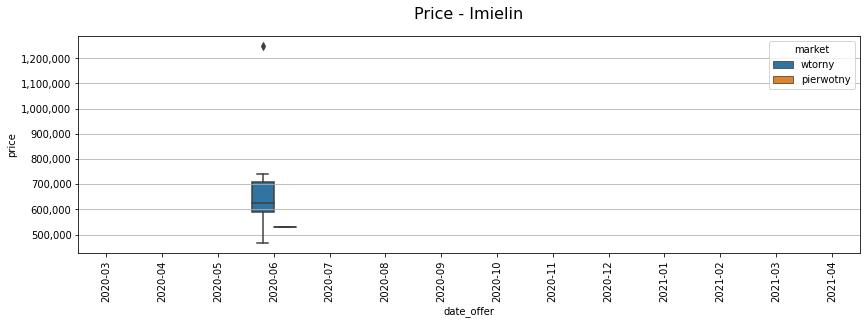

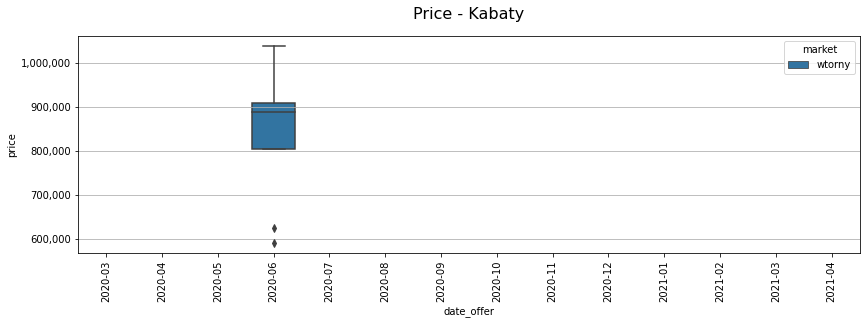

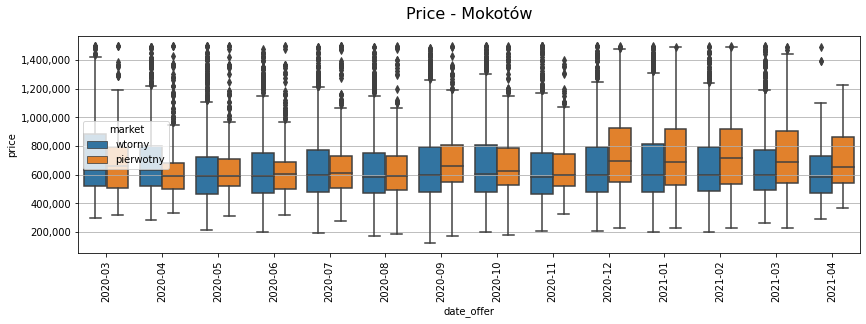

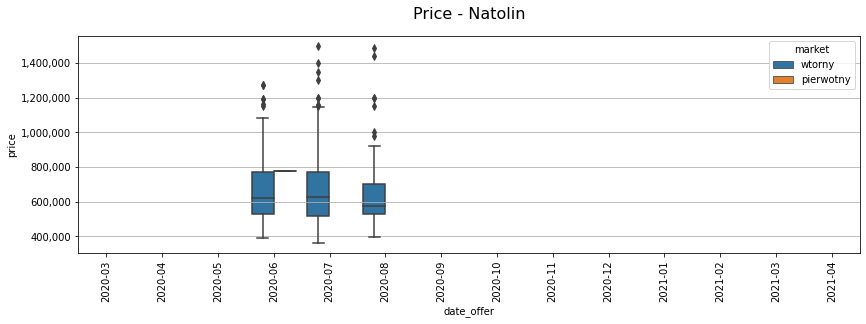

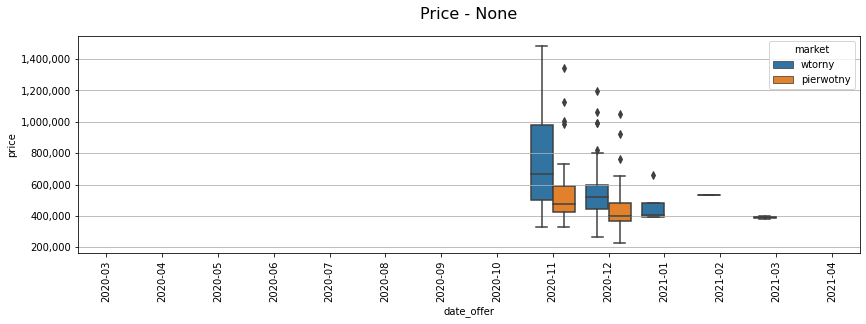

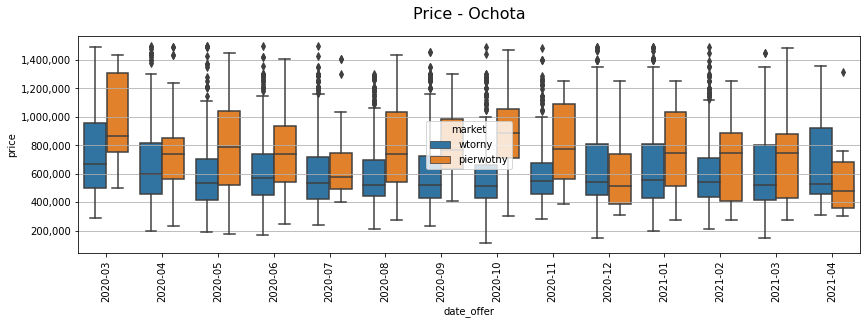

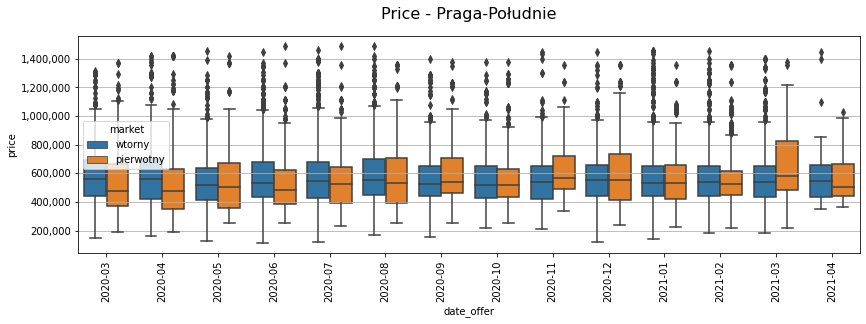

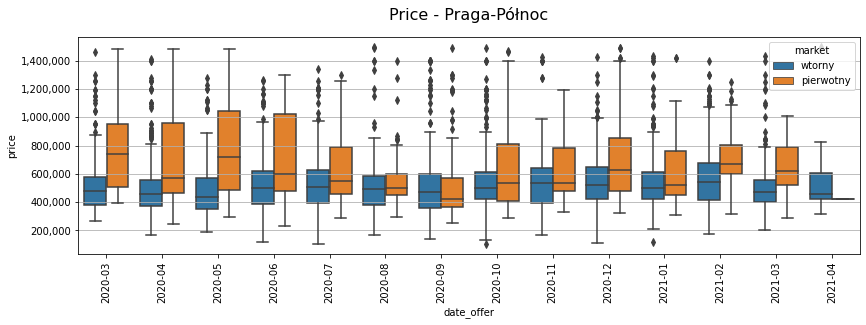

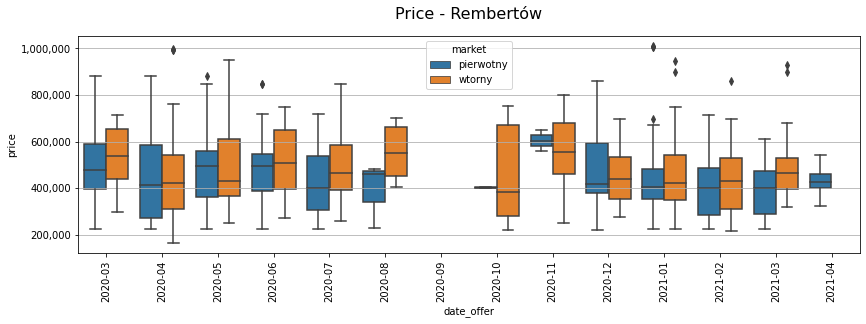

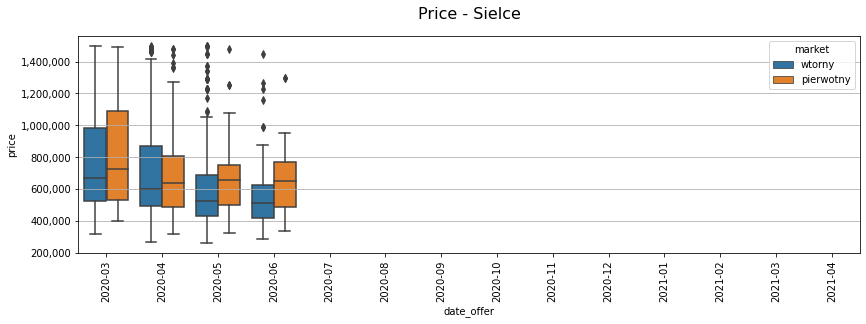

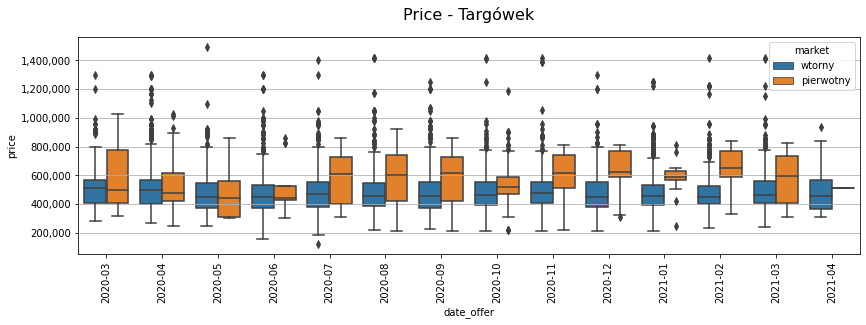

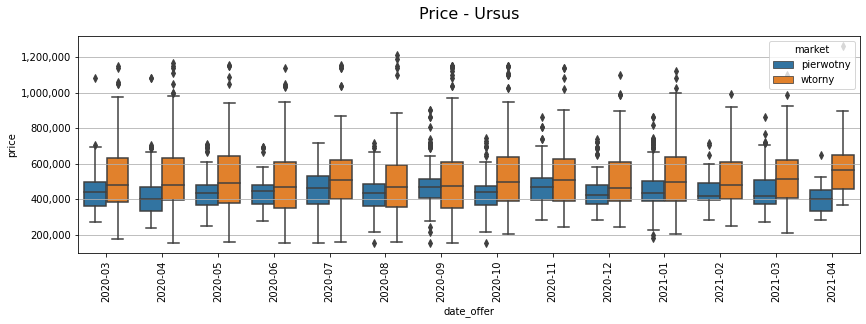

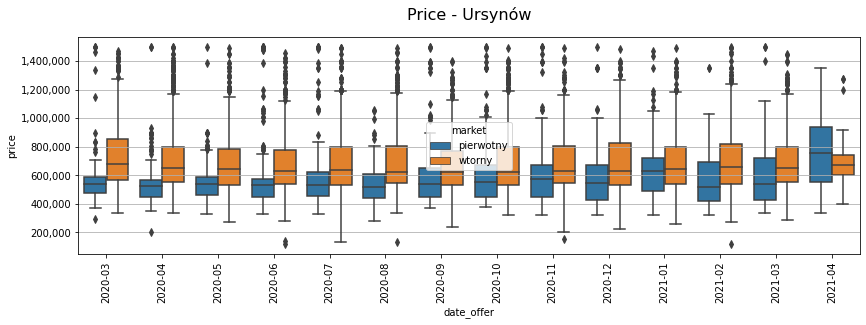

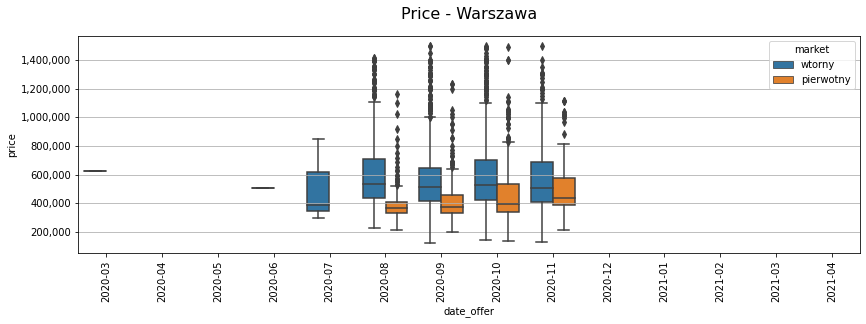

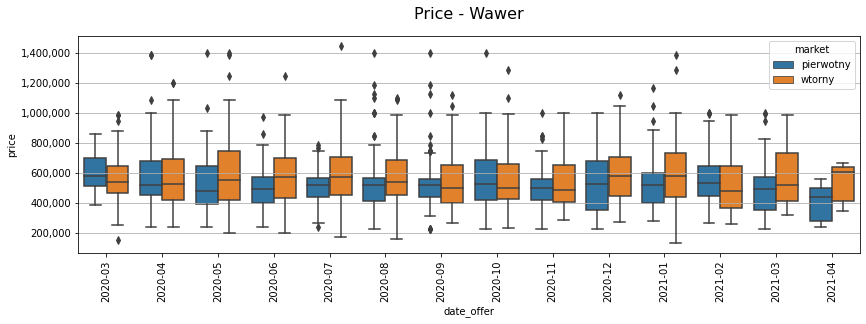

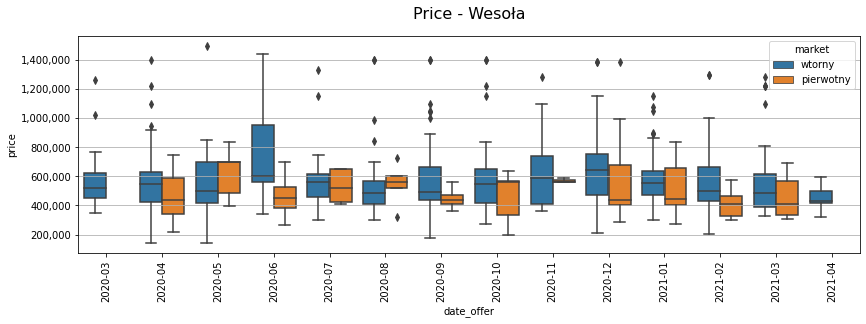

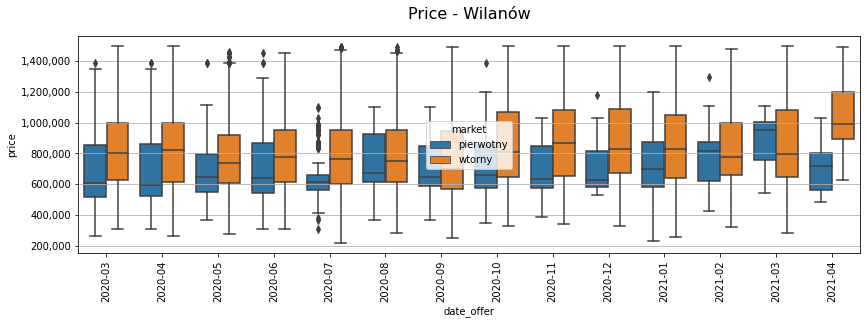

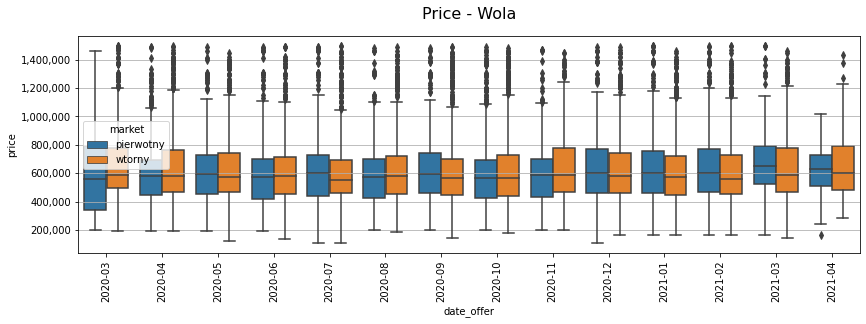

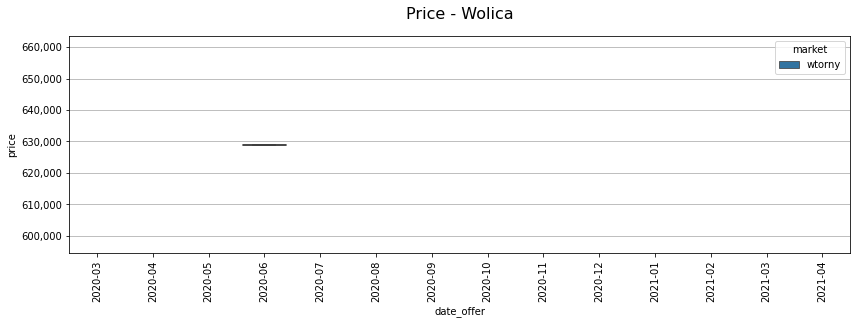

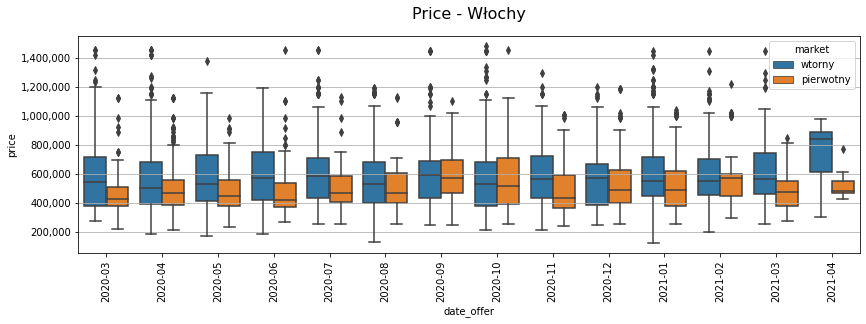

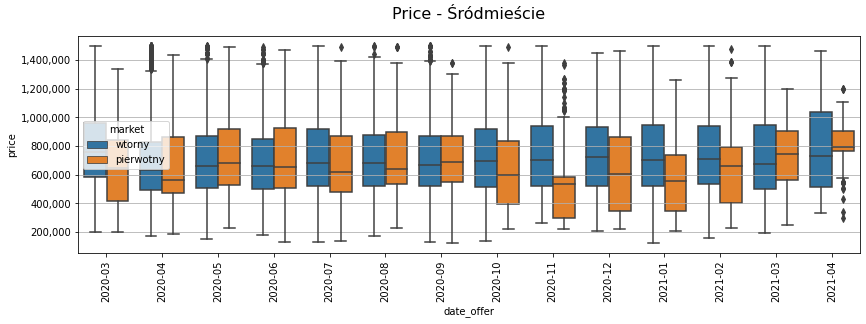

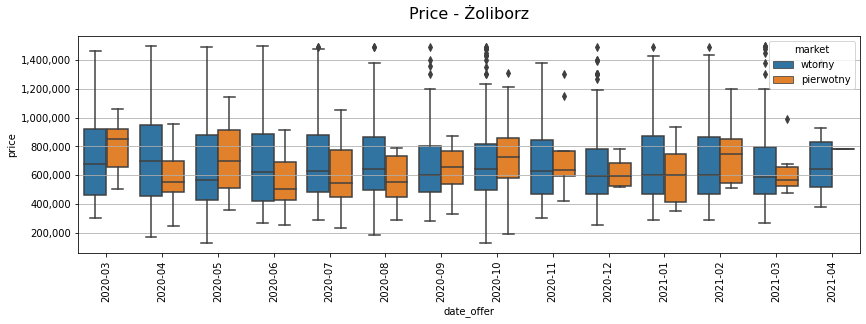

In [41]:
_tmp = pd.DataFrame(
    {'date_offer':df.date_offer.dt.to_period("M"),
     'price':df.price,
     'market':df.market,
     'GC_addr_suburb': df.GC_addr_suburb,
     'GC_addr_city':df.GC_addr_city,
     'flat_size':df.flat_size})
_tmp = _tmp.query("date_offer >= '2020-03' and price > 10e4 and price < 15e5 and flat_size < 250 and GC_addr_city=='Warszawa'").reset_index()

for m in sorted(_tmp.GC_addr_suburb.fillna('brak').unique()):

    if m != 'brak':
        fig, ax = plt.subplots(figsize=(14,4))
        sns.boxplot(x="date_offer",  y="price",hue='market', data=_tmp.query(f"GC_addr_suburb=='{m}'"), ax=ax, order=sorted(_tmp.date_offer.unique()))
        plt.xticks(rotation=90)
        plt.title(f'Price - {m}', y=1.05, fontsize = 16)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y))) 
        ax.yaxis.grid(True)
        plt.show()
